# **CS5481: Data Engineering- Assignment 2**


# (a) (5 marks) Assume you need datasets to train a recommender system that predicts user preferences for products. Use ChatGPT to generate a synthetic dataset for training a recommender system and visualize it. List the prompts you used and the corresponding outputs from ChatGPT.

**Prompt: I need datasets to train a recommender system that predicts user preferences for products.Now, generate a synthetic dataset for training a recommender system and visualize it.**

answer：
Here’s a synthetic dataset for training a recommender system. It includes 200 users, 50 products, and 2,000 interactions with ratings from 1 to 5.

The visualization shows:

Left: The overall distribution of ratings (most users give mid to high ratings).

Right: The Top 10 most rated products, showing which items received the most user interactions.

In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define dataset parameters
n_users = 200
n_products = 50
n_interactions = 2000

# Generate synthetic user and product IDs
user_ids = [f"U{i:03d}" for i in range(1, n_users + 1)]
product_ids = [f"P{i:03d}" for i in range(1, n_products + 1)]

# Generate interaction data
data = {
    "user_id": np.random.choice(user_ids, n_interactions),
    "product_id": np.random.choice(product_ids, n_interactions),
    "rating": np.random.randint(1, 6, n_interactions),
    "timestamp": pd.date_range("2024-01-01", periods=n_interactions, freq="H")
}

# Create dataframe and save as CSV
df = pd.DataFrame(data)
df.to_csv("synthetic_recommender_dataset.csv", index=False)

print("Dataset saved as 'synthetic_recommender_dataset.csv'")


Dataset saved as 'synthetic_recommender_dataset.csv'


/tmp/ipython-input-4222888927.py:21: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  "timestamp": pd.date_range("2024-01-01", periods=n_interactions, freq="H")


📄 datareview：
  user_id product_id  rating            timestamp
0    U103       P022       3  2024-01-01 00:00:00
1    U180       P039       3  2024-01-01 01:00:00
2    U093       P002       5  2024-01-01 02:00:00
3    U015       P038       5  2024-01-01 03:00:00
4    U107       P039       1  2024-01-01 04:00:00

📊 basic count：
            rating
count  2000.000000
mean      3.019000
std       1.418677
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000


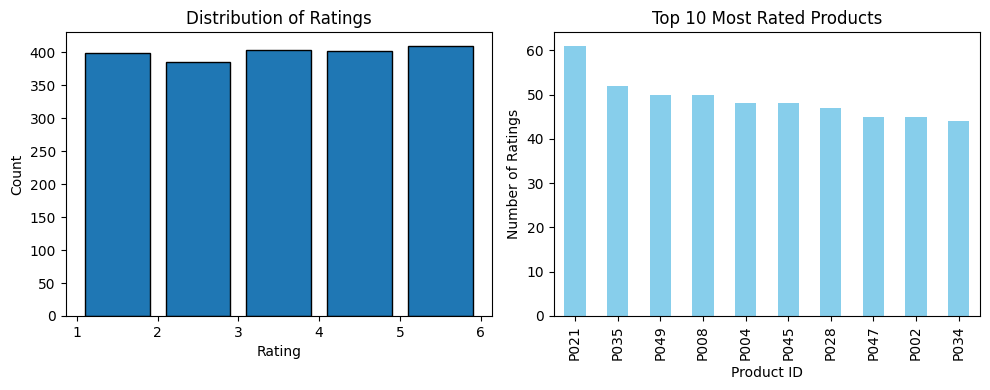

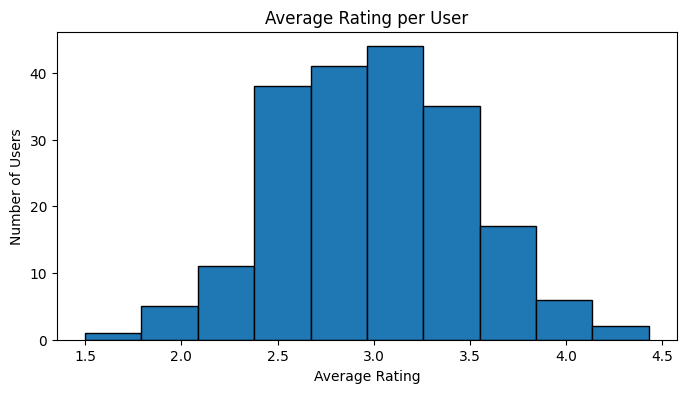

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("synthetic_recommender_dataset.csv")


print("📄 datareview：")
print(df.head())


print("\n📊 basic count：")
print(df.describe())


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df["rating"], bins=range(1, 7), edgecolor='black', rwidth=0.8)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")


top_products = df["product_id"].value_counts().head(10)
plt.subplot(1, 2, 2)
top_products.plot(kind="bar", color="skyblue")
plt.title("Top 10 Most Rated Products")
plt.xlabel("Product ID")
plt.ylabel("Number of Ratings")

plt.tight_layout()
plt.show()

user_avg_rating = df.groupby("user_id")["rating"].mean()
plt.figure(figsize=(8, 4))
plt.hist(user_avg_rating, bins=10, edgecolor='black')
plt.title("Average Rating per User")
plt.xlabel("Average Rating")
plt.ylabel("Number of Users")
plt.show()

# (b) (5 marks) Use ChatGPT to preprocess a sample from the MovieLens-1M dataset, including handling missing values and encoding categorical variables. List the prompts, inputs, and outputs from ChatGPT.

**Prompt: i need you to preproce a sample from the MovieLens-1M dataset, including handling missing values and encoding categorical variables. First, you should find a way to download MovieLens-1M dataset, which should be included in the code you give to me.**

answer:
Perfect — let’s build this step by step.
Below is a complete Python script that:

✅ 1. Downloads the MovieLens 1M dataset
 automatically from the official GroupLens source.
✅ 2. Loads the dataset into pandas DataFrames.
✅ 3. Preprocesses the data — handles missing values, encodes categorical features (like gender, occupation, genres).
✅ 4. Creates a clean sample ready for recommender system training.

In [ ]:
import pandas as pd
import numpy as np
import zipfile
import os
import urllib.request

# ============================================================
# 1️⃣ Download and Extract MovieLens 1M Dataset
# ============================================================

url = "https://files.grouplens.org/datasets/movielens/ml-1m.zip"
dataset_path = "ml-1m.zip"

# Download if not already present
if not os.path.exists(dataset_path):
    print("📥 Downloading MovieLens 1M dataset...")
    urllib.request.urlretrieve(url, dataset_path)
    print("✅ Download complete!")

# Extract files
if not os.path.exists("ml-1m"):
    with zipfile.ZipFile(dataset_path, "r") as zip_ref:
        zip_ref.extractall()
    print("✅ Extraction complete!")

# ============================================================
# 2️⃣ Load Dataset Files
# ============================================================

# The files use "::" as separators
users = pd.read_csv("ml-1m/users.dat", sep="::", engine="python",
                    names=["UserID", "Gender", "Age", "Occupation", "Zip-code"],
                    encoding="ISO-8859-1")

movies = pd.read_csv("ml-1m/movies.dat", sep="::", engine="python",
                     names=["MovieID", "Title", "Genres"], encoding="ISO-8859-1")


ratings = pd.read_csv("ml-1m/ratings.dat", sep="::", engine="python",
                      names=["UserID", "MovieID", "Rating", "Timestamp"],
                      encoding="ISO-8859-1")

# ============================================================
# 3️⃣ Merge the Three Tables
# ============================================================

data = pd.merge(pd.merge(ratings, users), movies)
print("✅ Merged dataset shape:", data.shape)
print(data.head())

# ============================================================
# 4️⃣ Handle Missing Values
# ============================================================

# Check missing values
print("\n🔍 Missing values before handling:")
print(data.isnull().sum())

# Drop rows with missing critical values (none usually in MovieLens, but good practice)
data.dropna(inplace=True)

# ============================================================
# 5️⃣ Encode Categorical Variables
# ============================================================

# Encode gender: M -> 1, F -> 0
data["Gender"] = data["Gender"].map({"M": 1, "F": 0})

# Encode occupation as categorical integer codes
data["Occupation"] = data["Occupation"].astype("category").cat.codes

# Split genres by '|' and use MultiLabelBinarizer to encode
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(data["Genres"].str.split("|"))
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

# Merge back to main dataframe
data = pd.concat([data.drop(columns=["Genres"]), genres_df], axis=1)

# ============================================================
# 6️⃣ Create a Clean Sample for Training
# ============================================================

sample = data[["UserID", "MovieID", "Gender", "Age", "Occupation", "Rating"] + list(mlb.classes_)]
print("\n✅ Sample of the preprocessed dataset:")
print(sample.head())

# ============================================================
# 7️⃣ Save Preprocessed Sample
# ============================================================

sample.to_csv("movielens_1m_preprocessed_sample.csv", index=False)
print("\n💾 Saved as 'movielens_1m_preprocessed_sample.csv'")


✅ Merged dataset shape: (1000209, 10)
   UserID  MovieID  Rating  Timestamp Gender  Age  Occupation Zip-code  \
0       1     1193       5  978300760      F    1          10    48067   
1       1      661       3  978302109      F    1          10    48067   
2       1      914       3  978301968      F    1          10    48067   
3       1     3408       4  978300275      F    1          10    48067   
4       1     2355       5  978824291      F    1          10    48067   

                                    Title                        Genres  
0  One Flew Over the Cuckoo's Nest (1975)                         Drama  
1        James and the Giant Peach (1996)  Animation|Children's|Musical  
2                     My Fair Lady (1964)               Musical|Romance  
3                  Erin Brockovich (2000)                         Drama  
4                    Bug's Life, A (1998)   Animation|Children's|Comedy  

🔍 Missing values before handling:
UserID        0
MovieID       0
Rating

(c) (10 marks) Generate a preprocessing script using ChatGPT to format the dataset for a Collaborative Filtering model using Surprise. Correct any errors in the generated code, use the revised version to preprocess the dataset, and display the first 5 processed entries

In [ ]:
!pip install "numpy<2.0" --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 53.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thin

In [ ]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
import os
import urllib.request
import zipfile

def preprocess_movielens_for_surprise(ratings_file_path):
    """
    Loads MovieLens-1M ratings data and formats it for use with the Surprise library.

    Args:
    ratings_file_path (str): The path to the ratings.dat file.

    Returns:
    surprise.dataset.DatasetAutoFolds: A dataset object ready for Surprise algorithms.
    """
    # Define column names for the ratings.dat file
    r_names = ['user_id', 'movie_id', 'rating', 'timestamp']

    # Load the dataset using pandas
    # The MovieLens-1M dataset uses '::' as a separator
    try:
        ratings_df = pd.read_csv(ratings_file_path,
                                 sep='::',
                                 header=None,
                                 names=r_names,
                                 engine='python',
                                 encoding='latin-1')
        print("✅ Dataset loaded successfully.")
        print("First 5 rows of data:")
        print(ratings_df.head())
    except FileNotFoundError:
        print(f"Error: File not found at '{ratings_file_path}'.")
        return None

    # Surprise requires a Reader object to parse the data
    # We need to specify the rating scale, which is 1 to 5 for the MovieLens dataset
    reader = Reader(rating_scale=(1, 5))

    # Load the data from the pandas DataFrame into a Surprise dataset
    # The DataFrame must have three columns in the order: user ID, item ID, rating
    data = Dataset.load_from_df(ratings_df[['user_id', 'movie_id', 'rating']], reader)

    print("\n✅ Data has been successfully converted to Surprise dataset format.")

    return data

# --- Main execution flow ---
if __name__ == '__main__':
    # --- Automatic download and extraction of the dataset ---
    url = "https://files.grouplens.org/datasets/movielens/ml-1m.zip"
    zip_path = "ml-1m.zip"
    extract_dir = "ml-1m" # Directory name after extraction

    # Check if the extracted directory exists, if not, download and extract
    if not os.path.exists(extract_dir):
        if not os.path.exists(zip_path):
            print("📥 Downloading MovieLens 1M dataset...")
            urllib.request.urlretrieve(url, zip_path)
            print("✅ Download complete!")

        print("📦 Extracting dataset...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(".") # Extract to the current directory
        print("✅ Extraction complete!")
    else:
        print("ℹ️ Dataset directory already exists, skipping download and extraction.")

    # --- Execute preprocessing ---
    # Construct the correct path to the ratings.dat file
    movielens_ratings_path = os.path.join(extract_dir, 'ratings.dat')

    # Call the preprocessing function
    surprise_dataset = preprocess_movielens_for_surprise(movielens_ratings_path)

    if surprise_dataset:
        # Demo: Split the data into a training set and a test set to verify the format
        trainset, testset = train_test_split(surprise_dataset, test_size=0.2, random_state=42)

        print(f"\n✅ Dataset is ready for training.")
        print(f"Number of ratings in the training set: {trainset.n_ratings}")
        print(f"Number of ratings in the test set: {len(testset)}")

        # Print the first 5 records of the test set to show its format
        print("\nExample of the first 5 records in the test set:")
        print(testset[:5])

ℹ️ Dataset directory already exists, skipping download and extraction.
✅ Dataset loaded successfully.
First 5 rows of data:
   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291

✅ Data has been successfully converted to Surprise dataset format.

✅ Dataset is ready for training.
Number of ratings in the training set: 800167
Number of ratings in the test set: 200042

Example of the first 5 records in the test set:
[(1841, 3717, 1.0), (3715, 880, 3.0), (2002, 3072, 4.0), (3332, 2734, 3.0), (3576, 631, 3.0)]


## **Question 2- Data Indexing**

(a) (5 marks) What is the value of p for this B+ tree? (Note that p is the order of a B+ tree)

P is 3.

(b) (6marks) Can youre-build a taller B+ tree with the same value of p using the same set of search-key values in the leaf nodes of the given tree? If yes, show the steps by drawing a new diagram whenever the height of the tree increases.

    the height is 1                    [21| ]
                          


    the height is 2                   [34| ]
                                     /    \
                                [21| ] -> [41| ]


    the height is 3                       [41| ]
                                       /        \
                                [34| ]          [51| ]
                               /     \         /     \
                        [21| ]----->[34| ]->[41| ]->[51|53]


    the height is 4                          [53| ]
                                      /                  \
                            [41| ]                            [83| ]
                          /       \                         /     \
                    [34| ]        [51| ]            [77| ]           [85| ]
                   /    \         /    \           /   \            /   \
               [21| ]->[34| ]->[41| ]->[51| ]->[53| ]->[77| ]->[83| ]->[85|86]

(c) (6 marks) Insert the search-key values 32, 84, and 19 in sequence to the given B+ tree, and draw a newdiagram for each insertion.

                                          [53|83]
                                  /          |           \
                    [32|41]                 [77| ]           [85| ]
            
               /      |       \           /     \            /   \
           [19|21]->[32|34]->[41|51]->[53| ]->[77| ]->[83|84]->[85|86]

(d) (8 marks) Suggest a sequence of search-key values to be deleted from the resultant B+ tree in (b) to shrink the tree to 2 levels with the least number of deletions. Show the steps by drawing a new diagram whenever a node is deleted.

    delete 21                                  [53|83]
                                   /              |           \
                            [41|51 ]           [77| ]         [85| ]
                           /   |    \         /    \         /    \
                    [34| ]->[41| ]->[51| ]->[53| ]->[77| ]->[83| ]->[85|86]


    delete 34                                  [51|83]
                                   /              |           \
                            [51| ]             [77| ]        [85| ]
                           /   \             /    \         /    \
                       [41| ]->[51| ]->[53| ]->[77| ]->[83| ]->[85|86]


    delete 41                            [83| ]
                                   /              \
                            [53|77]              [85| ]
                           /   |    \            /    \
                       [51| ]->[53| ]->[77| ]->[83| ]->[85|86]


    delete 51                         [83| ]
                                   /          \
                            [77| ]           [85| ]
                           /     \           /    \

                       [34| ]->[77| ] -> [83| ]->[85|86]

    delete 34                      
                                [83| 85]           
                            /      |     \     
                       [77| ] -> [83| ]->[85|86]


                       
                       

# **Question 3- Data Querying**

(a) (5marks)Write a query to print the hacker id,name,and the number of distinct tasks each hacker participated in, but only for hackers who participated in more tasks than the average number of tasks per hacker. Sort the result by the number of tasks in descending order, and then by hacker id in ascending order if there’s a tie.

In [ ]:
SELECT
    H.hacker_id,
    H.name,
    COUNT(DISTINCT S.task_id) AS distinct_tasks
FROM
    Hackers AS H
JOIN
    Submissions AS S ON H.hacker_id = S.hacker_id
GROUP BY
    H.hacker_id, H.name
HAVING
    COUNT(DISTINCT S.task_id) > (
        SELECT
            AVG(T.task_count)
        FROM
            (
                SELECT
                    COUNT(DISTINCT task_id) AS task_count
                FROM
                    Submissions
                GROUP BY
                    hacker_id
            ) AS T
    )
ORDER BY
    distinct_tasks DESC,
    H.hacker_id ASC;


(b) (5 marks) Write a query to find the task id, description, and the total bonus awarded for each task. Sort the result by task id in ascending order.

In [ ]:

SELECT
    task_id,
    description,
    COUNT（bonus） AS total_bonus_awarded,
FROM
    Tasks
GROUP BY
    task_id,description
ORDER BY
    task_id ASC;

(c) (5 marks) Write a query using nested subqueries to list the submission id, hacker id, name, and score of the highest-scoring submission for each task submitted on 2023-01-01. If multiple submissions have the highest score for the same task, return the submission with the smallest submission id. Sort the result by task id in ascending order.

In [ ]:
SELECT
    S.submission_id,
    S.hacker_id,
    H.name,
    S.score
FROM
    Submissions S
JOIN
    Hackers H ON S.hacker_id = H.hacker_id
WHERE
    S.submission_date = '2023-01-01'
    AND (S.task_id, S.score) IN (
        SELECT
            task_id,
            MAX(score)
        FROM
            Submissions
        WHERE
            submission_date = '2023-01-01'
        GROUP BY
            task_id
    )
    AND S.submission_id = (
        SELECT
            MIN(S_inner.submission_id)
        FROM
            Submissions S_inner
        WHERE
            S_inner.task_id = S.task_id
            AND S_inner.submission_date = '2023-01-01'
            AND S_inner.score = S.score
    )
ORDER BY
    S.task_id ASC;

(d) (5marks)Write a query to print the hacker id, name, the total score each hacker achieved across all tasks, the number of tasks they participated in, and their average score per task. For each task, only the hacker’s best score counts. Sort the result by total score in descending order and by hacker id in ascending order if there’s a tie.

In [ ]:

WITH BestScores AS (
    SELECT
        hacker_id,
        task_id,
        score
    FROM (
        SELECT
            hacker_id,
            task_id,
            score,
            ROW_NUMBER() OVER(PARTITION BY hacker_id, task_id ORDER BY score DESC, submission_id ASC) as rn
        FROM
            Submissions
    ) AS T
    WHERE
        rn = 1
)

SELECT
    H.hacker_id,
    H.name,
    SUM(BS.score) AS total_score,
    COUNT(BS.task_id) AS participated_tasks,
    CAST(SUM(BS.score) AS DECIMAL(10, 2)) / COUNT(BS.task_id) AS average_score_per_task
FROM
    Hackers H
JOIN
    BestScores BS ON H.hacker_id = BS.hacker_id
GROUP BY
    H.hacker_id, H.name
ORDER BY
    total_score DESC,
    H.hacker_id ASC;

(e) (5 marks) Write a query to find the hacker id, name, and bank account of hackers who
did not participate in any tasks.

In [ ]:
SELECT
    H.hacker_id,
    H.name,
    H.bank_account
FROM
    Hackers AS H
LEFT JOIN
    Submissions AS S ON H.hacker_id = S.hacker_id
WHERE
    S.hacker_id IS NULL;

# **Question 4- Recommender System**

(a) (8marks)Please write and briefly explain two basic approaches for recommender system.

1. Collaborative Filtering：It analyzes users' behavior and preferences to identify similarities between users, and then recommends items that they might be interested in.

2. Content-Based Filtering：It creates a profile of the user’s preferences based on the features of items the user has interacted with in the past

(b) (8 marks) One common challenge in recommender systems is the cold start problem. Explain what the cold start problem is and how it affects recommendation quality. Suggest at least two strategies to mitigate the cold start issue.

Explanation: The cold start problem occurs when a recommender system has insufficient data about either the users or the items, making it difficult to generate accurate recommendations.

Impact: The system cannot rely on past data to identify preferences or similarities. This leads to less accurate, less personalized, and often more generic recommendations.

Strategies：
1. use Content-Based Filtering for new user.
2. When a new user registers, actively ask them to provide some initial preferences.

(c) (14 marks) Top-N recommendation is an important task for recommender systems. Try to implement a recommendation model using the Goodbooks-10k dataset to generate top-10 book recommendations. You have two options based on your compute power:
  

1. Option1(Full Dataset): For those who can access sufficient compute power, they are recommendedto use the entire dataset (6 million ratings for 10,000 books by 53,000 users)
2.   List item

. Option 2 (Partial Dataset): For those who can only access very limited compute power, use a subset of the data, for example, the top 5,000 users and top 3,000 books based on the number of interactions (ratings). Clearly indicate that you are using the subset due to resource constraints in your submission if you choose this option.

In [3]:
!pip install numpy
!pip install pandas
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 63.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [2]:
import requests
import zipfile
import io
import os

def download_and_unzip(url, target_filename):
    try:
        response = requests.get(url)
        response.raise_for_status()
        with zipfile.ZipFile(io.BytesIO(response.content)) as zf:
            csv_filename = None
            for name in zf.namelist():
                if name.endswith('.csv'):
                    csv_filename = name
                    break

            if csv_filename:
                print(f"unzip {csv_filename} to {target_filename}...")
                with open(target_filename, 'wb') as f:
                    f.write(zf.read(csv_filename))
                print(f"file {target_filename} saved。")
            else:
                print(f"error：didn't find '.csv' in {url} 's ZIP file.")

    except requests.exceptions.RequestException as e:
        print(f"download fail: {e}")
    except zipfile.BadZipFile:
        print("error：download invalid ZIP file。")
    except Exception as e:
        print(f"unknown error: {e}")

ratings_url = "https://github.com/zygmuntz/goodbooks-10k/releases/download/v1.0/ratings.zip"
ratings_target = "ratings.csv"

books_url = "https://github.com/zygmuntz/goodbooks-10k/releases/download/v1.0/books.zip"
books_target = "books.csv"


if not os.path.exists(ratings_target):
    download_and_unzip(ratings_url, ratings_target)
else:
    print(f"{ratings_target} exist，skip downloading.")

if not os.path.exists(books_target):
    download_and_unzip(books_url, books_target)
else:
    print(f"{books_target} exist，skip downloading.")

print("\ndatasets download finished.")

unzip ratings.csv to ratings.csv...
file ratings.csv saved。
unzip books.csv to books.csv...
file books.csv saved。

datasets download finished.


In [1]:
import torch
print(torch.cuda.is_available())  # Should return True if GPU is available

True


In [9]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import time

class MatrixFactorizationGPU(nn.Module):
    def __init__(self, n_users, n_items, n_factors=50, device='cuda'):
        super().__init__()
        self.device = device
        self.n_factors = n_factors

        # Initialize user and item embeddings
        self.user_factors = nn.Embedding(n_users, n_factors)
        self.item_factors = nn.Embedding(n_items, n_factors)

        # Add bias terms
        self.user_bias = nn.Embedding(n_users, 1)
        self.item_bias = nn.Embedding(n_items, 1)
        self.global_bias = nn.Parameter(torch.zeros(1))

        # Initialize with small random values
        nn.init.normal_(self.user_factors.weight, std=0.1)
        nn.init.normal_(self.item_factors.weight, std=0.1)
        nn.init.zeros_(self.user_bias.weight)
        nn.init.zeros_(self.item_bias.weight)

        self.to(device)

    def forward(self, user_ids, item_ids):
        user_embeds = self.user_factors(user_ids)
        item_embeds = self.item_factors(item_ids)
        user_b = self.user_bias(user_ids).squeeze()
        item_b = self.item_bias(item_ids).squeeze()

        # Dot product + biases
        predictions = (user_embeds * item_embeds).sum(dim=1) + user_b + item_b + self.global_bias
        return predictions

    def predict_all(self, user_id):
        user_embed = self.user_factors.weight[user_id]
        user_b = self.user_bias.weight[user_id]
        scores = torch.matmul(user_embed, self.item_factors.weight.T) + user_b + self.item_bias.weight.squeeze() + self.global_bias
        return scores

class RecommenderSystem:
    def __init__(self, n_factors=50, learning_rate=0.01, reg_lambda=0.01, n_epochs=20):
        self.n_factors = n_factors
        self.learning_rate = learning_rate
        self.reg_lambda = reg_lambda
        self.n_epochs = n_epochs
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.user_mapper = {}
        self.item_mapper = {}
        self.user_inv_mapper = {}
        self.item_inv_mapper = {}
        self.model = None
    def fit(self, ratings_df):
        unique_users = ratings_df['user_id'].unique()
        unique_items = ratings_df['book_id'].unique()

        self.user_mapper = {user: idx for idx, user in enumerate(unique_users)}
        self.item_mapper = {item: idx for idx, item in enumerate(unique_items)}
        self.user_inv_mapper = {idx: user for user, idx in self.user_mapper.items()}
        self.item_inv_mapper = {idx: item for item, idx in self.item_mapper.items()}

        user_indices = torch.LongTensor([self.user_mapper[u] for u in ratings_df['user_id'].values])
        item_indices = torch.LongTensor([self.item_mapper[i] for i in ratings_df['book_id'].values])
        ratings = torch.FloatTensor(ratings_df['rating'].values)

        self.model = MatrixFactorizationGPU(
            len(unique_users),
            len(unique_items),
            self.n_factors,
            self.device
        )

        user_indices = user_indices.to(self.device)
        item_indices = item_indices.to(self.device)
        ratings = ratings.to(self.device)

        # Training setup
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        criterion = nn.MSELoss()

        # Learning rate scheduler
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

        # Training loop
        print("\n" + "="*60)
        print("STEP 3: Training model...")
        print("="*60)

        batch_size = 10000
        n_batches = (len(ratings) + batch_size - 1) // batch_size

        # Early stopping
        best_loss = float('inf')
        patience = 5
        patience_counter = 0

        for epoch in range(self.n_epochs):
            self.model.train()
            epoch_loss = 0
            epoch_start = time.time()

            # Create progress bar for batches
            pbar = tqdm(range(n_batches), desc=f"Epoch {epoch+1}/{self.n_epochs}")

            for batch_idx in pbar:
                start_idx = batch_idx * batch_size
                end_idx = min((batch_idx + 1) * batch_size, len(ratings))

                batch_users = user_indices[start_idx:end_idx]
                batch_items = item_indices[start_idx:end_idx]
                batch_ratings = ratings[start_idx:end_idx]

                # Forward pass
                predictions = self.model(batch_users, batch_items)
                loss = criterion(predictions, batch_ratings)

                # Backward pass
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                epoch_loss += loss.item()

                # Update progress bar
                pbar.set_postfix({'loss': f'{loss.item():.4f}'})

            avg_loss = epoch_loss / n_batches
            epoch_time = time.time() - epoch_start
            current_lr = optimizer.param_groups[0]['lr']
            print(f"Epoch {epoch+1} completed in {epoch_time:.2f}s - Avg Loss: {avg_loss:.4f} - LR: {current_lr:.6f}")

            # Adjust learning rate if loss plateaus
            old_lr = current_lr
            scheduler.step(avg_loss)
            new_lr = optimizer.param_groups[0]['lr']
            if new_lr < old_lr:
                print(f"  → Learning rate reduced: {old_lr:.6f} → {new_lr:.6f}")

            # Early stopping
            if avg_loss < best_loss - 0.001:  # Improvement threshold
                best_loss = avg_loss
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f"\nEarly stopping: Loss hasn't improved for {patience} epochs")
                    break

        print("\n✓ Training completed!")

    def recommend_top_n(self, user_id, n=10, exclude_items=None):
        if user_id not in self.user_mapper:
            return []

        user_idx = self.user_mapper[user_id]

        self.model.eval()
        with torch.no_grad():
            scores = self.model.predict_all(user_idx)

            # Exclude already rated items
            if exclude_items:
                for item_id in exclude_items:
                    if item_id in self.item_mapper:
                        item_idx = self.item_mapper[item_id]
                        scores[item_idx] = -float('inf')

            # Get top N
            top_indices = torch.argsort(scores, descending=True)[:n]
            top_indices = top_indices.cpu().numpy()

        recommendations = [self.item_inv_mapper[idx] for idx in top_indices]
        return recommendations


def evaluate_recommendations(model, test_df, train_df, k=10):
    print("\n" + "="*60)
    print("STEP 4: Evaluating model...")
    print("="*60)

    # Group data
    test_user_items = test_df.groupby('user_id')['book_id'].apply(set).to_dict()
    train_user_items = train_df.groupby('user_id')['book_id'].apply(set).to_dict()

    users_to_evaluate = list(test_user_items.keys())
    print(f"Evaluating {len(users_to_evaluate)} users...")

    hits = 0
    total_users = 0
    precision_sum = 0
    recall_sum = 0
    f1_sum = 0

    # Progress bar for evaluation
    for user_id in tqdm(users_to_evaluate, desc="Evaluating users"):
        if user_id not in model.user_mapper:
            continue

        test_items = test_user_items[user_id]
        rated_items = train_user_items.get(user_id, set())

        # Get recommendations
        recommendations = model.recommend_top_n(user_id, n=k, exclude_items=rated_items)

        if len(recommendations) == 0:
            continue

        # Calculate metrics
        recommended_set = set(recommendations)
        hits_for_user = len(recommended_set & test_items)

        if hits_for_user > 0:
            hits += 1

        precision = hits_for_user / k
        recall = hits_for_user / len(test_items) if len(test_items) > 0 else 0

        if precision + recall > 0:
            f1 = 2 * (precision * recall) / (precision + recall)
        else:
            f1 = 0

        precision_sum += precision
        recall_sum += recall
        f1_sum += f1
        total_users += 1

    # Calculate final metrics
    hit_rate = hits / total_users if total_users > 0 else 0
    avg_precision = precision_sum / total_users if total_users > 0 else 0
    avg_recall = recall_sum / total_users if total_users > 0 else 0
    avg_f1 = f1_sum / total_users if total_users > 0 else 0

    print("\n" + "="*60)
    print("EVALUATION RESULTS")
    print("="*60)
    print(f"Total users evaluated: {total_users:,}")
    print(f"Hit Rate@{k}:        {hit_rate:.4f} ({hit_rate*100:.2f}%)")
    print(f"Average Precision:   {avg_precision:.4f}")
    print(f"Average Recall:      {avg_recall:.4f}")
    print(f"Average F1 Score:    {avg_f1:.4f}")
    print("="*60 + "\n")

    return {
        'hit_rate': hit_rate,
        'precision': avg_precision,
        'recall': avg_recall,
        'f1_score': avg_f1
    }


def main():
    start_time = time.time()
    ratings_df = pd.read_csv('ratings.csv')
    books_df = pd.read_csv('books.csv')
    load_time = time.time() - start_time
    print(f"✓ Dataset loaded in {load_time:.2f}s")
    print(f"  - Ratings: {len(ratings_df):,}")
    print(f"  - Books: {len(books_df):,}")
    print(f"  - Users: {ratings_df['user_id'].nunique():,}")
    print(f"  - Rating range: {ratings_df['rating'].min():.0f} - {ratings_df['rating'].max():.0f}")

    # Split data
    print("\nSplitting data (80% train, 20% test)...")
    train_df, test_df = train_test_split(ratings_df, test_size=0.2, random_state=42)
    print(f"  - Training set: {len(train_df):,} ratings")
    print(f"  - Test set: {len(test_df):,} ratings")

    # Train model
    model = RecommenderSystem(n_factors=50, learning_rate=0.1, reg_lambda=0.0, n_epochs=80)
    model.fit(train_df)

    # Evaluate
    metrics = evaluate_recommendations(model, test_df, train_df, k=10)

    # Show sample recommendations
    print("="*60)
    print("SAMPLE RECOMMENDATIONS")
    print("="*60)

    sample_users = ratings_df['user_id'].unique()[:3]

    for user_id in sample_users:
        rated_items = train_df[train_df['user_id'] == user_id]['book_id'].tolist()
        recommendations = model.recommend_top_n(user_id, n=10, exclude_items=set(rated_items))

        print(f"\nUser {user_id} (rated {len(rated_items)} books):")
        print("  Top-10 Recommendations:")

        for i, book_id in enumerate(recommendations, 1):
            book_info = books_df[books_df['book_id'] == book_id]
            if not book_info.empty:
                title = book_info.iloc[0]['title']
                authors = book_info.iloc[0]['authors']
                print(f"    {i:2d}. {title}")
                print(f"        by {authors}")
            else:
                print(f"    {i:2d}. Book ID: {book_id}")

    print("\n" + "="*60)
    print("✓ RECOMMENDATION SYSTEM COMPLETED!")
    print("="*60)


if __name__ == "__main__":
    main()


✓ Dataset loaded in 1.39s
  - Ratings: 5,976,479
  - Books: 10,000
  - Users: 53,424
  - Rating range: 1 - 5

Splitting data (80% train, 20% test)...
  - Training set: 4,781,183 ratings
  - Test set: 1,195,296 ratings

STEP 3: Training model...


Epoch 1/80: 100%|██████████| 479/479 [00:02<00:00, 230.12it/s, loss=38.1714]


Epoch 1 completed in 2.08s - Avg Loss: 21.6689 - LR: 0.100000


Epoch 2/80: 100%|██████████| 479/479 [00:02<00:00, 237.91it/s, loss=32.7426]


Epoch 2 completed in 2.02s - Avg Loss: 18.4725 - LR: 0.100000


Epoch 3/80: 100%|██████████| 479/479 [00:02<00:00, 239.31it/s, loss=75.6297]


Epoch 3 completed in 2.00s - Avg Loss: 5.8854 - LR: 0.100000


Epoch 4/80: 100%|██████████| 479/479 [00:01<00:00, 240.70it/s, loss=132.0066]


Epoch 4 completed in 1.99s - Avg Loss: 3.4928 - LR: 0.100000


Epoch 5/80: 100%|██████████| 479/479 [00:02<00:00, 227.28it/s, loss=175.0774]


Epoch 5 completed in 2.11s - Avg Loss: 5.1577 - LR: 0.100000


Epoch 6/80: 100%|██████████| 479/479 [00:02<00:00, 209.93it/s, loss=185.5871]


Epoch 6 completed in 2.28s - Avg Loss: 499.2231 - LR: 0.100000


Epoch 7/80: 100%|██████████| 479/479 [00:02<00:00, 227.04it/s, loss=103.1393]


Epoch 7 completed in 2.11s - Avg Loss: 103.2488 - LR: 0.100000
  → Learning rate reduced: 0.100000 → 0.050000


Epoch 8/80: 100%|██████████| 479/479 [00:02<00:00, 234.07it/s, loss=60.1429]


Epoch 8 completed in 2.05s - Avg Loss: 17.0707 - LR: 0.050000


Epoch 9/80: 100%|██████████| 479/479 [00:02<00:00, 228.50it/s, loss=20.4826]


Epoch 9 completed in 2.10s - Avg Loss: 2.9624 - LR: 0.050000


Epoch 10/80: 100%|██████████| 479/479 [00:02<00:00, 224.79it/s, loss=7.9534]


Epoch 10 completed in 2.13s - Avg Loss: 2.0079 - LR: 0.050000


Epoch 11/80: 100%|██████████| 479/479 [00:02<00:00, 221.96it/s, loss=6.4996]


Epoch 11 completed in 2.16s - Avg Loss: 2.2060 - LR: 0.050000


Epoch 12/80: 100%|██████████| 479/479 [00:02<00:00, 220.48it/s, loss=5.1473]


Epoch 12 completed in 2.17s - Avg Loss: 3.0712 - LR: 0.050000


Epoch 13/80: 100%|██████████| 479/479 [00:02<00:00, 211.81it/s, loss=4.1313]


Epoch 13 completed in 2.26s - Avg Loss: 4.6914 - LR: 0.050000
  → Learning rate reduced: 0.050000 → 0.025000


Epoch 14/80: 100%|██████████| 479/479 [00:02<00:00, 228.87it/s, loss=1.1094]


Epoch 14 completed in 2.10s - Avg Loss: 2.0135 - LR: 0.025000


Epoch 15/80: 100%|██████████| 479/479 [00:02<00:00, 232.83it/s, loss=1.1734]


Epoch 15 completed in 2.06s - Avg Loss: 1.4831 - LR: 0.025000


Epoch 16/80: 100%|██████████| 479/479 [00:02<00:00, 229.90it/s, loss=1.2262]


Epoch 16 completed in 2.09s - Avg Loss: 1.8239 - LR: 0.025000


Epoch 17/80: 100%|██████████| 479/479 [00:02<00:00, 233.43it/s, loss=1.4846]


Epoch 17 completed in 2.06s - Avg Loss: 2.4088 - LR: 0.025000


Epoch 18/80: 100%|██████████| 479/479 [00:02<00:00, 225.35it/s, loss=1.5096]


Epoch 18 completed in 2.13s - Avg Loss: 3.1262 - LR: 0.025000
  → Learning rate reduced: 0.025000 → 0.012500


Epoch 19/80: 100%|██████████| 479/479 [00:02<00:00, 220.83it/s, loss=0.8439]


Epoch 19 completed in 2.17s - Avg Loss: 1.7421 - LR: 0.012500


Epoch 20/80: 100%|██████████| 479/479 [00:02<00:00, 208.64it/s, loss=0.8253]


Epoch 20 completed in 2.30s - Avg Loss: 1.2100 - LR: 0.012500


Epoch 21/80: 100%|██████████| 479/479 [00:02<00:00, 228.39it/s, loss=0.9175]


Epoch 21 completed in 2.10s - Avg Loss: 1.2713 - LR: 0.012500


Epoch 22/80: 100%|██████████| 479/479 [00:02<00:00, 232.40it/s, loss=0.9669]


Epoch 22 completed in 2.06s - Avg Loss: 1.3863 - LR: 0.012500


Epoch 23/80: 100%|██████████| 479/479 [00:02<00:00, 225.28it/s, loss=0.8713]


Epoch 23 completed in 2.13s - Avg Loss: 1.4916 - LR: 0.012500
  → Learning rate reduced: 0.012500 → 0.006250


Epoch 24/80: 100%|██████████| 479/479 [00:02<00:00, 225.25it/s, loss=0.5911]


Epoch 24 completed in 2.13s - Avg Loss: 1.0974 - LR: 0.006250


Epoch 25/80: 100%|██████████| 479/479 [00:02<00:00, 224.34it/s, loss=0.5772]


Epoch 25 completed in 2.14s - Avg Loss: 0.9438 - LR: 0.006250


Epoch 26/80: 100%|██████████| 479/479 [00:02<00:00, 207.44it/s, loss=0.5344]


Epoch 26 completed in 2.31s - Avg Loss: 0.9501 - LR: 0.006250


Epoch 27/80: 100%|██████████| 479/479 [00:02<00:00, 214.26it/s, loss=0.5313]


Epoch 27 completed in 2.24s - Avg Loss: 0.9654 - LR: 0.006250


Epoch 28/80: 100%|██████████| 479/479 [00:02<00:00, 229.07it/s, loss=0.5104]


Epoch 28 completed in 2.09s - Avg Loss: 0.9737 - LR: 0.006250
  → Learning rate reduced: 0.006250 → 0.003125


Epoch 29/80: 100%|██████████| 479/479 [00:02<00:00, 228.73it/s, loss=0.4657]


Epoch 29 completed in 2.10s - Avg Loss: 0.8332 - LR: 0.003125


Epoch 30/80: 100%|██████████| 479/479 [00:02<00:00, 231.39it/s, loss=0.4573]


Epoch 30 completed in 2.07s - Avg Loss: 0.7828 - LR: 0.003125


Epoch 31/80: 100%|██████████| 479/479 [00:02<00:00, 231.14it/s, loss=0.4362]


Epoch 31 completed in 2.07s - Avg Loss: 0.7820 - LR: 0.003125


Epoch 32/80: 100%|██████████| 479/479 [00:02<00:00, 217.40it/s, loss=0.4275]


Epoch 32 completed in 2.21s - Avg Loss: 0.7819 - LR: 0.003125


Epoch 33/80: 100%|██████████| 479/479 [00:02<00:00, 215.57it/s, loss=0.4118]


Epoch 33 completed in 2.23s - Avg Loss: 0.7793 - LR: 0.003125


Epoch 34/80: 100%|██████████| 479/479 [00:02<00:00, 215.70it/s, loss=0.4013]


Epoch 34 completed in 2.22s - Avg Loss: 0.7742 - LR: 0.003125


Epoch 35/80: 100%|██████████| 479/479 [00:02<00:00, 224.88it/s, loss=0.3905]


Epoch 35 completed in 2.13s - Avg Loss: 0.7672 - LR: 0.003125


Epoch 36/80: 100%|██████████| 479/479 [00:02<00:00, 223.20it/s, loss=0.3818]


Epoch 36 completed in 2.15s - Avg Loss: 0.7584 - LR: 0.003125


Epoch 37/80: 100%|██████████| 479/479 [00:02<00:00, 224.67it/s, loss=0.3706]


Epoch 37 completed in 2.14s - Avg Loss: 0.7477 - LR: 0.003125


Epoch 38/80: 100%|██████████| 479/479 [00:02<00:00, 222.17it/s, loss=0.3479]


Epoch 38 completed in 2.16s - Avg Loss: 0.7357 - LR: 0.003125


Epoch 39/80: 100%|██████████| 479/479 [00:02<00:00, 223.22it/s, loss=0.3297]


Epoch 39 completed in 2.15s - Avg Loss: 0.7232 - LR: 0.003125


Epoch 40/80: 100%|██████████| 479/479 [00:02<00:00, 231.62it/s, loss=0.3181]


Epoch 40 completed in 2.07s - Avg Loss: 0.7105 - LR: 0.003125


Epoch 41/80: 100%|██████████| 479/479 [00:02<00:00, 213.48it/s, loss=0.2998]


Epoch 41 completed in 2.25s - Avg Loss: 0.6977 - LR: 0.003125


Epoch 42/80: 100%|██████████| 479/479 [00:02<00:00, 233.64it/s, loss=0.2814]


Epoch 42 completed in 2.05s - Avg Loss: 0.6847 - LR: 0.003125


Epoch 43/80: 100%|██████████| 479/479 [00:02<00:00, 226.09it/s, loss=0.2651]


Epoch 43 completed in 2.12s - Avg Loss: 0.6719 - LR: 0.003125


Epoch 44/80: 100%|██████████| 479/479 [00:02<00:00, 221.89it/s, loss=0.2496]


Epoch 44 completed in 2.16s - Avg Loss: 0.6591 - LR: 0.003125


Epoch 45/80: 100%|██████████| 479/479 [00:02<00:00, 233.53it/s, loss=0.2371]


Epoch 45 completed in 2.06s - Avg Loss: 0.6463 - LR: 0.003125


Epoch 46/80: 100%|██████████| 479/479 [00:02<00:00, 184.50it/s, loss=0.2236]


Epoch 46 completed in 2.60s - Avg Loss: 0.6339 - LR: 0.003125


Epoch 47/80: 100%|██████████| 479/479 [00:02<00:00, 177.09it/s, loss=0.2138]


Epoch 47 completed in 2.72s - Avg Loss: 0.6216 - LR: 0.003125


Epoch 48/80: 100%|██████████| 479/479 [00:02<00:00, 227.19it/s, loss=0.2021]


Epoch 48 completed in 2.11s - Avg Loss: 0.6096 - LR: 0.003125


Epoch 49/80: 100%|██████████| 479/479 [00:02<00:00, 220.88it/s, loss=0.1949]


Epoch 49 completed in 2.17s - Avg Loss: 0.5981 - LR: 0.003125


Epoch 50/80: 100%|██████████| 479/479 [00:02<00:00, 219.05it/s, loss=0.1834]


Epoch 50 completed in 2.19s - Avg Loss: 0.5868 - LR: 0.003125


Epoch 51/80: 100%|██████████| 479/479 [00:02<00:00, 227.54it/s, loss=0.1757]


Epoch 51 completed in 2.11s - Avg Loss: 0.5759 - LR: 0.003125


Epoch 52/80: 100%|██████████| 479/479 [00:02<00:00, 219.63it/s, loss=0.1659]


Epoch 52 completed in 2.18s - Avg Loss: 0.5654 - LR: 0.003125


Epoch 53/80: 100%|██████████| 479/479 [00:02<00:00, 221.99it/s, loss=0.1585]


Epoch 53 completed in 2.16s - Avg Loss: 0.5551 - LR: 0.003125


Epoch 54/80: 100%|██████████| 479/479 [00:02<00:00, 206.73it/s, loss=0.1488]


Epoch 54 completed in 2.32s - Avg Loss: 0.5453 - LR: 0.003125


Epoch 55/80: 100%|██████████| 479/479 [00:02<00:00, 223.05it/s, loss=0.1436]


Epoch 55 completed in 2.15s - Avg Loss: 0.5359 - LR: 0.003125


Epoch 56/80: 100%|██████████| 479/479 [00:02<00:00, 224.48it/s, loss=0.1354]


Epoch 56 completed in 2.14s - Avg Loss: 0.5266 - LR: 0.003125


Epoch 57/80: 100%|██████████| 479/479 [00:02<00:00, 220.93it/s, loss=0.1298]


Epoch 57 completed in 2.17s - Avg Loss: 0.5180 - LR: 0.003125


Epoch 58/80: 100%|██████████| 479/479 [00:02<00:00, 224.51it/s, loss=0.1237]


Epoch 58 completed in 2.14s - Avg Loss: 0.5094 - LR: 0.003125


Epoch 59/80: 100%|██████████| 479/479 [00:02<00:00, 219.01it/s, loss=0.1193]


Epoch 59 completed in 2.19s - Avg Loss: 0.5012 - LR: 0.003125


Epoch 60/80: 100%|██████████| 479/479 [00:02<00:00, 216.49it/s, loss=0.1143]


Epoch 60 completed in 2.21s - Avg Loss: 0.4933 - LR: 0.003125


Epoch 61/80: 100%|██████████| 479/479 [00:02<00:00, 210.24it/s, loss=0.1112]


Epoch 61 completed in 2.28s - Avg Loss: 0.4858 - LR: 0.003125


Epoch 62/80: 100%|██████████| 479/479 [00:02<00:00, 217.23it/s, loss=0.1062]


Epoch 62 completed in 2.21s - Avg Loss: 0.4784 - LR: 0.003125


Epoch 63/80: 100%|██████████| 479/479 [00:02<00:00, 217.19it/s, loss=0.1027]


Epoch 63 completed in 2.21s - Avg Loss: 0.4713 - LR: 0.003125


Epoch 64/80: 100%|██████████| 479/479 [00:02<00:00, 220.19it/s, loss=0.1002]


Epoch 64 completed in 2.18s - Avg Loss: 0.4644 - LR: 0.003125


Epoch 65/80: 100%|██████████| 479/479 [00:02<00:00, 182.49it/s, loss=0.0967]


Epoch 65 completed in 2.63s - Avg Loss: 0.4578 - LR: 0.003125


Epoch 66/80: 100%|██████████| 479/479 [00:02<00:00, 165.79it/s, loss=0.0940]


Epoch 66 completed in 2.89s - Avg Loss: 0.4514 - LR: 0.003125


Epoch 67/80: 100%|██████████| 479/479 [00:02<00:00, 209.93it/s, loss=0.0897]


Epoch 67 completed in 2.29s - Avg Loss: 0.4452 - LR: 0.003125


Epoch 68/80: 100%|██████████| 479/479 [00:02<00:00, 207.24it/s, loss=0.0887]


Epoch 68 completed in 2.31s - Avg Loss: 0.4391 - LR: 0.003125


Epoch 69/80: 100%|██████████| 479/479 [00:02<00:00, 222.54it/s, loss=0.0851]


Epoch 69 completed in 2.16s - Avg Loss: 0.4332 - LR: 0.003125


Epoch 70/80: 100%|██████████| 479/479 [00:02<00:00, 214.71it/s, loss=0.0845]


Epoch 70 completed in 2.24s - Avg Loss: 0.4276 - LR: 0.003125


Epoch 71/80: 100%|██████████| 479/479 [00:02<00:00, 220.87it/s, loss=0.0807]


Epoch 71 completed in 2.17s - Avg Loss: 0.4221 - LR: 0.003125


Epoch 72/80: 100%|██████████| 479/479 [00:02<00:00, 215.03it/s, loss=0.0816]


Epoch 72 completed in 2.23s - Avg Loss: 0.4167 - LR: 0.003125


Epoch 73/80: 100%|██████████| 479/479 [00:02<00:00, 206.79it/s, loss=0.0788]


Epoch 73 completed in 2.32s - Avg Loss: 0.4115 - LR: 0.003125


Epoch 74/80: 100%|██████████| 479/479 [00:02<00:00, 205.21it/s, loss=0.0778]


Epoch 74 completed in 2.34s - Avg Loss: 0.4064 - LR: 0.003125


Epoch 75/80: 100%|██████████| 479/479 [00:02<00:00, 215.80it/s, loss=0.0751]


Epoch 75 completed in 2.22s - Avg Loss: 0.4014 - LR: 0.003125


Epoch 76/80: 100%|██████████| 479/479 [00:02<00:00, 219.45it/s, loss=0.0738]


Epoch 76 completed in 2.19s - Avg Loss: 0.3967 - LR: 0.003125


Epoch 77/80: 100%|██████████| 479/479 [00:02<00:00, 220.90it/s, loss=0.0725]


Epoch 77 completed in 2.17s - Avg Loss: 0.3921 - LR: 0.003125


Epoch 78/80: 100%|██████████| 479/479 [00:02<00:00, 217.71it/s, loss=0.0764]


Epoch 78 completed in 2.20s - Avg Loss: 0.3875 - LR: 0.003125


Epoch 79/80: 100%|██████████| 479/479 [00:02<00:00, 218.36it/s, loss=0.0733]


Epoch 79 completed in 2.20s - Avg Loss: 0.3831 - LR: 0.003125


Epoch 80/80: 100%|██████████| 479/479 [00:02<00:00, 210.41it/s, loss=0.0707]


Epoch 80 completed in 2.28s - Avg Loss: 0.3788 - LR: 0.003125

✓ Training completed!

STEP 4: Evaluating model...
Evaluating 53423 users...


Evaluating users: 100%|██████████| 53423/53423 [01:41<00:00, 525.40it/s]



EVALUATION RESULTS
Total users evaluated: 53,423
Hit Rate@10:        0.0047 (0.47%)
Average Precision:   0.0005
Average Recall:      0.0002
Average F1 Score:    0.0003

SAMPLE RECOMMENDATIONS

User 1 (rated 94 books):
  Top-10 Recommendations:
     1. Tractatus Logico-Philosophicus
        by Ludwig Wittgenstein
     2. Courageous
        by Randy Alcorn, Alex Kendrick, Stephen Kendrick
     3. The Virgin Cure
        by Ami McKay
     4. The Man With a Load of Mischief (Richard Jury, #1)
        by Martha Grimes
     5. Travel Team
        by Mike Lupica
     6. Cloudstreet
        by Tim Winton
     7. Epileptic
        by David B.
     8. Someone
        by Alice McDermott
     9. The Shepherd's Crown (Discworld, #41; Tiffany Aching, #5)
        by Terry Pratchett
    10. Go Away, Big Green Monster!
        by Ed Emberley

User 2 (rated 50 books):
  Top-10 Recommendations:
     1. The Quantum Thief (Jean le Flambeur, #1)
        by Hannu Rajaniemi
     2. Ethics
        by Baruch S